In [1]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import models

from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import seaborn as sns

import pandas as pd

In [2]:
import tensorflow.keras.datasets.mnist as mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)

11490434/11490434 [==============================] - 0s 0us/step


**Question : faire de même avec l'ensemble des images de tests**

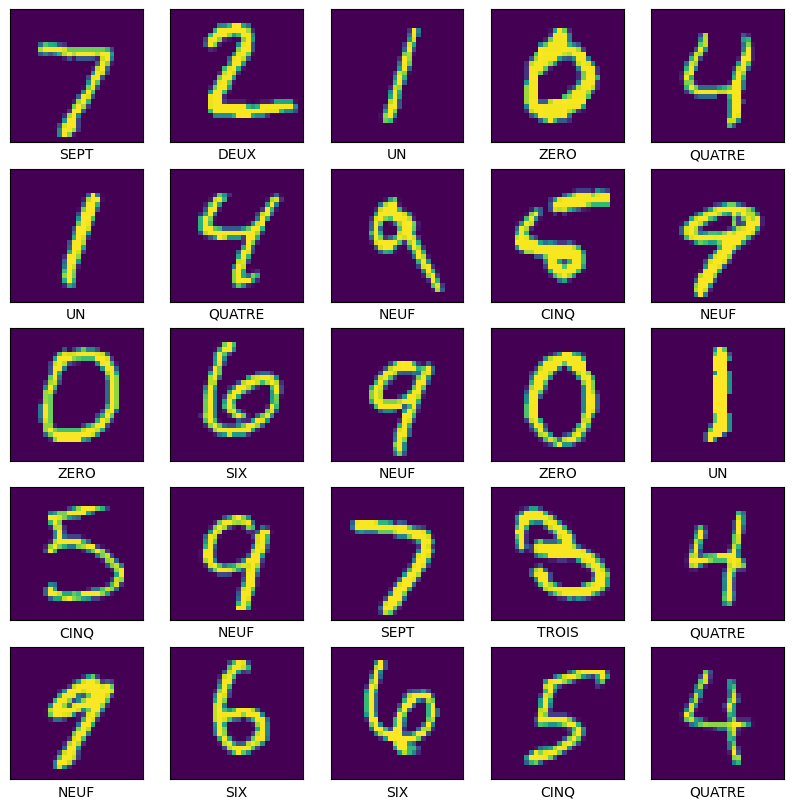

In [ ]:
# MNIST
class_names = ['ZERO', 'UN', 'DEUX', 'TROIS', 'QUATRE', 'CINQ',
               'SIX', 'SEPT', 'HUIT', 'NEUF']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])
    plt.xlabel(class_names[y_test[i]])
plt.show()

In [ ]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten


def cnn(in_shape=(28, 28, 1),out_shape=10):

    # Couche "feature map"
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=in_shape))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))

    # Couche classification
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(out_shape,activation="sigmoid"))

    return model

model = cnn()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                346176    
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 347146 (1.32 MB)
Trainable params: 347146 (1.32 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

**Question : quelle est la taille de la sortie de la couche __Flatten__?**

Size after faltten is 5408

**Question : quel est le nombre de paramètres du modèle complet ?**

The model has 347146 parameters

**Question : sur la base de ce que vous avez fait à la fin du TP précédent, écrire les lignes de code pour définir les paramètres de l'apprentissage et pour lancer le fitting du modèle sur 10 epochs.**

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=tf.optimizers.Adam(learning_rate=1e-3), metrics=['accuracy'])
history = model.fit(x_train, y_train_cat,validation_split=0.2,epochs=10, batch_size=10,verbose=1)
# _, accuracy = model.evaluate(X, y,verbose=1)


Epoch 1/10
4800/4800 [==============================] - 22s 5ms/step - loss: 0.7738 - accuracy: 0.5053 - val_loss: 0.9779 - val_accuracy: 0.3866
Epoch 2/10
4800/4800 [==============================] - 20s 4ms/step - loss: 0.5752 - accuracy: 0.6351 - val_loss: 0.5220 - val_accuracy: 0.6731
Epoch 3/10
4800/4800 [==============================] - 20s 4ms/step - loss: 0.4884 - accuracy: 0.6906 - val_loss: 0.4801 - val_accuracy: 0.7142
Epoch 4/10
4800/4800 [==============================] - 19s 4ms/step - loss: 0.4856 - accuracy: 0.6954 - val_loss: 0.4789 - val_accuracy: 0.6929
Epoch 5/10
4800/4800 [==============================] - 19s 4ms/step - loss: 0.4786 - accuracy: 0.6935 - val_loss: 0.4847 - val_accuracy: 0.6979
Epoch 6/10
4800/4800 [==============================] - 21s 4ms/step - loss: 0.4685 - accuracy: 0.7030 - val_loss: 0.4757 - val_accuracy: 0.6965
Epoch 7/10
4800/4800 [==============================] - 20s 4ms/step - loss: 0.4695 - accuracy: 0.7075 - val_loss: 0.4737 - val_ac

**Question : évaluer le modèle obtenu sur la base de test complète et calculer l'accuracy.**

In [ ]:
_, train_accuracy = model.evaluate(x_train, y_train_cat,verbose=1)
_, test_accuracy = model.evaluate(x_test, y_test_cat,verbose=1)
print("train_accuracy : {:.2f}".format(train_accuracy))
print("test_accuracy : {:.2f}".format(test_accuracy))

313/313 [==============================] - 0s 1ms/step - loss: 0.5049 - accuracy: 0.7206
train_accuracy : 0.73
test_accuracy : 0.72


**Question : retrouver les images de la base de test sur lesquelles le modèle fait de mauvaises prédictions.**

In [ ]:
y_pred_cat = model.predict(x_test)
y_pred = np.argmax(y_pred_cat,axis=1)
y_pred_eror = y_pred != np.argmax(y_test_cat,axis=1)

  1/313 [..............................] - ETA: 3s

313/313 [==============================] - 0s 1ms/step


In [ ]:
print(y_pred[:10])
print(np.argmax(y_test_cat[y_pred_eror],axis=1)[:10])
print(x_test[y_pred_eror][0].shape)


[7 2 8 0 4 8 8 9 5 9]
[1 1 4 1 3 4 4 1 3 1]
(28, 28)


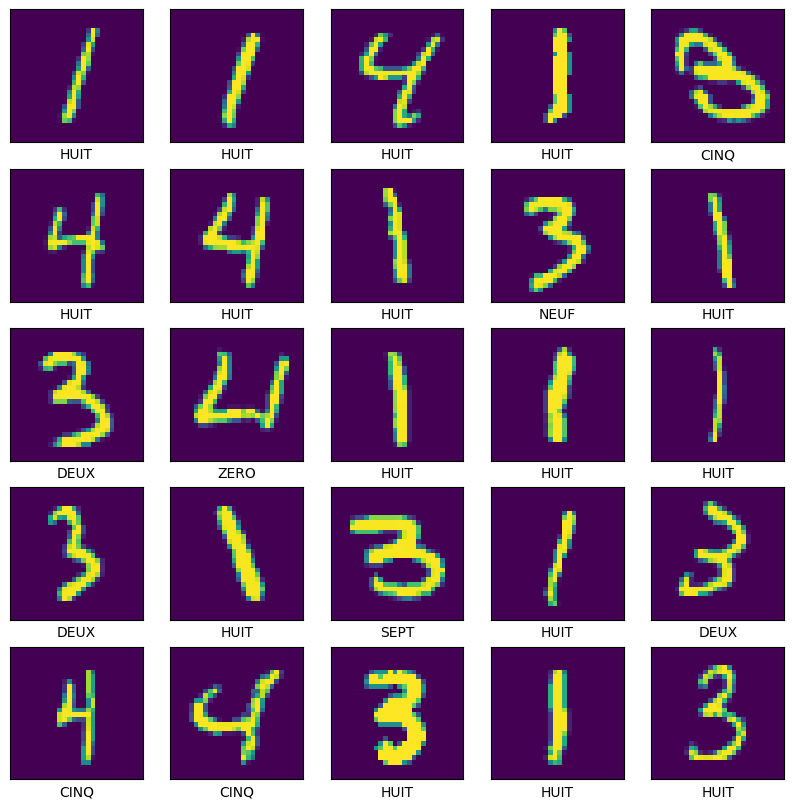

In [ ]:
class_names = ['ZERO', 'UN', 'DEUX', 'TROIS', 'QUATRE', 'CINQ',
               'SIX', 'SEPT', 'HUIT', 'NEUF']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[y_pred_eror][i])
    plt.xlabel(class_names[y_pred[y_pred_eror][i]])
plt.show()

**Question : définir un CNN dont la composition est la suivante et donner son nombre de paramètres :**

In [ ]:
def cnn(in_shape=(28, 28, 1),out_shape=10):

    # Couche "feature map"
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=in_shape))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(8, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))

    # Couche classification
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(out_shape,activation="sigmoid")))

    return model

model = cnn()
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 11, 11, 16)        4624      
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 5, 5, 16)          0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 3, 3, 8)           1160      
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 1, 1, 8)          

**Question : lancer son entraînement sur la base d'entrainement sur 10 épochs, des batchs de 32 images et un split de 20% pour la base d'évaluation.**

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=tf.optimizers.Adam(learning_rate=1e-4), metrics=['accuracy'])
history = model.fit(x_train, y_train_cat,validation_split=0.2,epochs=10, batch_size=32,verbose=1)



Epoch 1/10
4800/4800 [==============================] - 21s 4ms/step - loss: 0.5192 - accuracy: 0.5365 - val_loss: 0.4323 - val_accuracy: 0.6769
Epoch 2/10
4800/4800 [==============================] - 19s 4ms/step - loss: 0.4196 - accuracy: 0.6889 - val_loss: 0.4106 - val_accuracy: 0.7092
Epoch 3/10
4800/4800 [==============================] - 19s 4ms/step - loss: 0.4193 - accuracy: 0.6874 - val_loss: 0.4089 - val_accuracy: 0.7096
Epoch 4/10
4800/4800 [==============================] - 20s 4ms/step - loss: 0.3938 - accuracy: 0.7229 - val_loss: 0.3917 - val_accuracy: 0.7326
Epoch 5/10
4800/4800 [==============================] - 19s 4ms/step - loss: 0.3909 - accuracy: 0.7278 - val_loss: 0.3846 - val_accuracy: 0.7387
Epoch 6/10
4800/4800 [==============================] - 20s 4ms/step - loss: 0.3866 - accuracy: 0.7309 - val_loss: 0.3893 - val_accuracy: 0.7228
Epoch 7/10
4800/4800 [==============================] - 19s 4ms/step - loss: 0.3986 - accuracy: 0.7243 - val_loss: 0.3834 - val_ac

**Question : evaluer ce modèle sur la base de test et calculer la valeur d'accuracy.**

In [ ]:
_, train_accuracy = model.evaluate(x_train, y_train_cat,verbose=1)
_, test_accuracy = model.evaluate(x_test, y_test_cat,verbose=1)
print("train_accuracy : {:.2f}".format(train_accuracy))
print("test_accuracy : {:.2f}".format(test_accuracy))

313/313 [==============================] - 0s 1ms/step - loss: 0.3643 - accuracy: 0.7534
train_accuracy : 0.75
test_accuracy : 0.75


# Color Image Classification

**Question : définir, entraîner, tracer les courbes et évaluer l'architecture convolutive suivante. Utiliser l'algorithme Adam, fixer le nombre d'epochs à 100 et la taille des batchs à 32 images. Garder à l'esprit que les images sont RGB donc certaines parties du code précédent devront être modifiées en conséquence. Vous mènerez l'évaluation sur la base de test. Voici l'architecture :**

In [7]:
import tensorflow.keras.datasets.cifar10 as cifar10

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)

In [4]:
import tensorflow.keras.datasets.cifar10 as cifar10

# Normalisation des valeurs RGBdes pixels
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
def cnn(in_shape=(32, 32, 3),out_shape=10):

    # Couche "feature map"
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding="same", input_shape=in_shape ))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding="same" ))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding="same"  ))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu' , padding="same"))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))


    # Couche classification
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(out_shape,activation="sigmoid"))

    return model

model = cnn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 256)       7168      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 256)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          73792     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 64)          0

**Question : quelles constatations pouvions nous en tirer si les couches CNN utilise un padding='valid' ?**


In [ ]:
def cnn(in_shape=(32, 32, 3),out_shape=10):

    # Couche "feature map"
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding="valid", input_shape=in_shape ))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding="valid" ))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding="valid"  ))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu' , padding="valid"))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))


    # Couche classification
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(out_shape,activation="sigmoid"))

    return model

model = cnn()
model.summary()

ValueError: Exception encountered when calling layer "conv2d_94" (type Conv2D).

Negative dimension size caused by subtracting 3 from 2 for '{{node conv2d_94/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_94/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,64], [3,3,64,32].

Call arguments received by layer "conv2d_94" (type Conv2D):
  • inputs=tf.Tensor(shape=(None, 2, 2, 64), dtype=float32)

**Question : en analysant les courbes d'apprentissage que constatez-vous (dans le cas padding='same') ?**

In [11]:
model = cnn()
model.compile(loss='binary_crossentropy', optimizer=tf.optimizers.Adam(learning_rate=1e-4), metrics=['accuracy'])
history = model.fit(x_train, y_train_cat,validation_split=0.2,epochs=10, batch_size=32,verbose=1)


Epoch 1/10
1250/1250 [==============================] - 11s 7ms/step - loss: 0.2993 - accuracy: 0.3293 - val_loss: 0.2665 - val_accuracy: 0.3896
Epoch 2/10
1250/1250 [==============================] - 10s 8ms/step - loss: 0.2386 - accuracy: 0.4671 - val_loss: 0.2293 - val_accuracy: 0.4914
Epoch 3/10
1250/1250 [==============================] - 10s 8ms/step - loss: 0.2140 - accuracy: 0.5383 - val_loss: 0.2136 - val_accuracy: 0.5396
Epoch 4/10
1250/1250 [==============================] - 9s 7ms/step - loss: 0.1966 - accuracy: 0.5852 - val_loss: 0.1989 - val_accuracy: 0.5820
Epoch 5/10
1250/1250 [==============================] - 10s 8ms/step - loss: 0.1823 - accuracy: 0.6238 - val_loss: 0.1883 - val_accuracy: 0.6079
Epoch 6/10
1250/1250 [==============================] - 8s 7ms/step - loss: 0.1685 - accuracy: 0.6571 - val_loss: 0.1780 - val_accuracy: 0.6309
Epoch 7/10
1250/1250 [==============================] - 9s 7ms/step - loss: 0.1579 - accuracy: 0.6849 - val_loss: 0.1689 - val_accur

KeyboardInterrupt: 

In [14]:
_, train_accuracy = model.evaluate(x_train, y_train_cat,verbose=1)
_, test_accuracy = model.evaluate(x_test, y_test_cat,verbose=1)
print("train_accuracy : {:.2f}".format(train_accuracy))
print("test_accuracy : {:.2f}".format(test_accuracy))

313/313 [==============================] - 1s 4ms/step - loss: 0.1091 - accuracy: 0.7771
train_accuracy : 0.84
test_accuracy : 0.78


**Question : en analysant les courbes d'apprentissage que constatez-vous (dans le cas padding='same') ?**

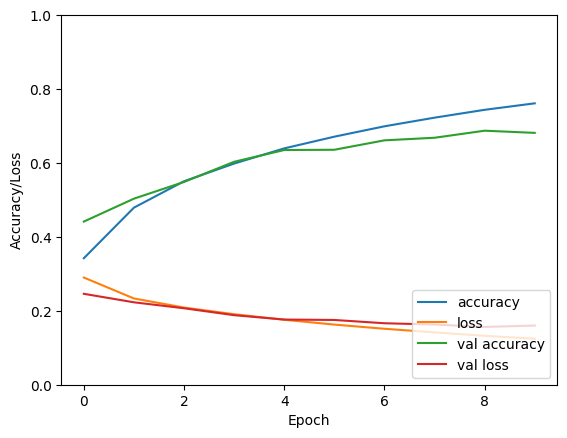

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')

**Question : définir cette structure de réseau et entraîner le réseau sur 50 epochs. Comparer les courbes d'apprentissage de cette expérimentation avec les courbes obtenues
sans __dropout__**

In [12]:
def cnn(in_shape=(32, 32, 3),out_shape=10,drop_rate=0.2):

    # Couche "feature map"
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding="same", input_shape=in_shape ))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Dropout(drop_rate))

    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding="same" ))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Dropout(drop_rate))

    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding="same"  ))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Dropout(drop_rate))

    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu' , padding="same"))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Dropout(drop_rate))

    # Couche classification
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(out_shape,activation="sigmoid"))

    return model

model = cnn()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 256)       7168      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 16, 16, 256)       0         
 ng2D)                                                           
                                                                 
 dropout (Dropout)           (None, 16, 16, 256)       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 128)       295040    
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 8, 8, 128)         0         
 ng2D)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 128)        

In [13]:
model = cnn()
model.compile(loss='binary_crossentropy', optimizer=tf.optimizers.Adam(learning_rate=1e-4), metrics=['accuracy'])
history = model.fit(x_train, y_train_cat,validation_split=0.2,epochs=50, batch_size=32,verbose=1)

Epoch 1/50
1250/1250 [==============================] - 14s 9ms/step - loss: 0.4638 - accuracy: 0.1274 - val_loss: 0.4440 - val_accuracy: 0.2103
Epoch 2/50
1250/1250 [==============================] - 11s 8ms/step - loss: 0.3117 - accuracy: 0.2119 - val_loss: 0.3416 - val_accuracy: 0.3042
Epoch 3/50
1250/1250 [==============================] - 11s 9ms/step - loss: 0.2849 - accuracy: 0.2871 - val_loss: 0.2917 - val_accuracy: 0.3778
Epoch 4/50
1250/1250 [==============================] - 11s 9ms/step - loss: 0.2649 - accuracy: 0.3528 - val_loss: 0.2657 - val_accuracy: 0.4292
Epoch 5/50
1250/1250 [==============================] - 11s 9ms/step - loss: 0.2511 - accuracy: 0.4005 - val_loss: 0.2484 - val_accuracy: 0.4623
Epoch 6/50
1250/1250 [==============================] - 11s 8ms/step - loss: 0.2394 - accuracy: 0.4360 - val_loss: 0.2320 - val_accuracy: 0.4991
Epoch 7/50
1250/1250 [==============================] - 10s 8ms/step - loss: 0.2291 - accuracy: 0.4663 - val_loss: 0.2280 - val_ac

In [15]:
_, train_accuracy = model.evaluate(x_train, y_train_cat,verbose=1)
_, test_accuracy = model.evaluate(x_test, y_test_cat,verbose=1)
print("train_accuracy : {:.2f}".format(train_accuracy))
print("test_accuracy : {:.2f}".format(test_accuracy))

313/313 [==============================] - 2s 5ms/step - loss: 0.1091 - accuracy: 0.7771
train_accuracy : 0.84
test_accuracy : 0.78


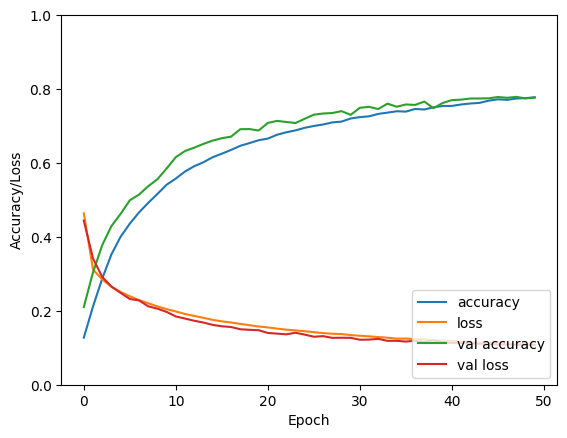

In [16]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')

# Analysis

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!tree -d /content/drive

**Question : appliquer cette fonction pour toutes les classes CIFAR-10.**

In [74]:
def show_failures(predictions, y_test, X_test, trueclass=None,
                  predictedclass=None, maxtoshow=10, im_shape = (32, 32, 3)):
    import matplotlib.pyplot as plt

    if len(predictions.shape) > 1:
        predictions = np.argmax(predictions, axis=1)
    errors = predictions != y_test.reshape(predictions.shape)
    print(errors.shape)
    print('Showing max', maxtoshow, 'first failures. The predicted class is '
          'shown first and the correct class in parenthesis.')
    ii = 0
    plt.figure(figsize=(maxtoshow, 1))
    for i in range(X_test.shape[0]):
        if ii >= maxtoshow:
            break
        if errors[i]:
            if trueclass is not None and y_test[i] != trueclass:
                continue
            if predictedclass is not None and predictions[i] != predictedclass:
                continue
            plt.subplot(1, maxtoshow, ii+1)
            plt.axis('off')
            plt.imshow(X_test[i, :].reshape(im_shape), cmap="gray")
            plt.title("%s (%s)" % (predictions[i], y_test[i]))
            ii = ii + 1

313/313 [==============================] - 1s 4ms/step
(10000,)
Showing max 10 first failures. The predicted class is shown first and the correct class in parenthesis.
(10000,)
Showing max 10 first failures. The predicted class is shown first and the correct class in parenthesis.
(10000,)
Showing max 10 first failures. The predicted class is shown first and the correct class in parenthesis.
(10000,)
Showing max 10 first failures. The predicted class is shown first and the correct class in parenthesis.
(10000,)
Showing max 10 first failures. The predicted class is shown first and the correct class in parenthesis.
(10000,)
Showing max 10 first failures. The predicted class is shown first and the correct class in parenthesis.
(10000,)
Showing max 10 first failures. The predicted class is shown first and the correct class in parenthesis.
(10000,)
Showing max 10 first failures. The predicted class is shown first and the correct class in parenthesis.
(10000,)
Showing max 10 first failures. T

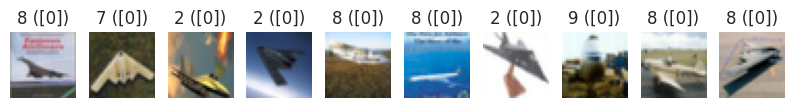

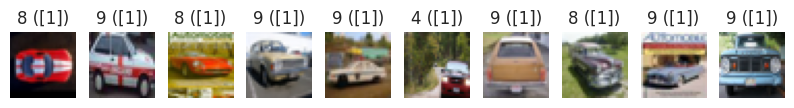

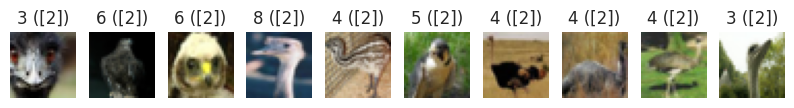

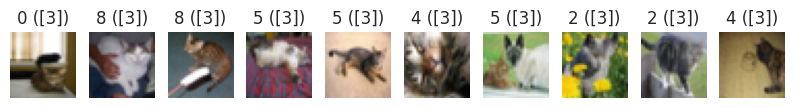

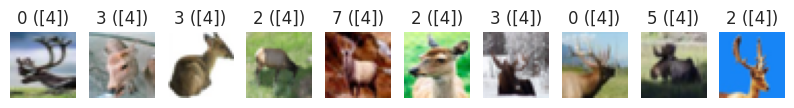

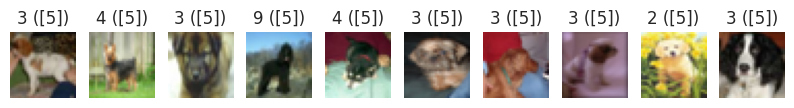

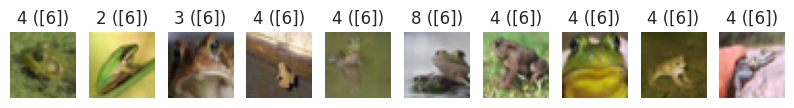

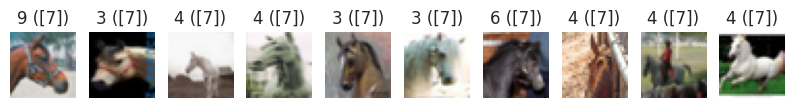

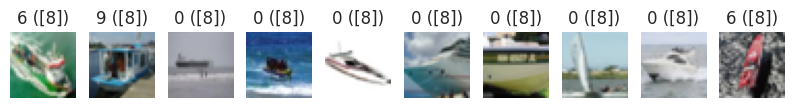

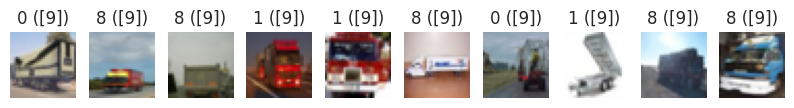

In [73]:
# from drive.MyDrive.esiee_TP_2024.pml_utils import show_failures

# prédiction sur la base de test
predictions=model.predict(x_test)
for c in range(10):
  show_failures(predictions, y_test, x_test, trueclass=c)

**Question : quelles classes semblent êtres les plus difficiles à prédire ?**

In [75]:
from sklearn.metrics import confusion_matrix
from numpy import argmax

print('Confusion matrix (rows: true classes; columns: predicted classes):'); print()
cm=confusion_matrix(y_test, argmax(predictions, axis=1), labels=list(range(10)))
print(cm); print()

print('Classification accuracy for each class:'); print()
for i,j in enumerate(cm.diagonal()/cm.sum(axis=1)): print("%d: %.4f" % (i,j))

Confusion matrix (rows: true classes; columns: predicted classes):

[[774  15  53   9  22   3   5  13  84  22]
 [ 16 868   2   2   2   2   4   3  37  64]
 [ 48   1 647  49 123  33  52  28  17   2]
 [ 14   4  64 591 105  90  58  36  25  13]
 [ 10   1  26  38 846   5  27  41   6   0]
 [  8   4  43 176  84 613  17  45   4   6]
 [  4   2  33  43  73  10 824   4   6   1]
 [ 10   2  33  30  70  28   2 818   2   5]
 [ 28  10   5   5   9   1   6   4 919  13]
 [ 20  41   5  11   5   2   2  12  31 871]]

Classification accuracy for each class:

0: 0.7740
1: 0.8680
2: 0.6470
3: 0.5910
4: 0.8460
5: 0.6130
6: 0.8240
7: 0.8180
8: 0.9190
9: 0.8710
